1. We are going to work with scraped data.
2. I have created a dataframe beforehand with the price range I am ready to pay.

# Exploratory analysis

In [133]:
import pandas as pd

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
dfn = pd.read_excel('notebooks1.xlsx')

In [137]:
dfn.head()

,id,flip,touchscreen,brand,full brand,processor,ram,ssd,hdd,graphics,spec,screen,dos,price,pricecash,pricemonthly
0,75,NaN,NaN,.Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8 ԳԲ RAM,512 ԳԲ SSD,absent,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200
1,135,NaN,NaN,.Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8 ԳԲ RAM,512 ԳԲ SSD,absent,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200
2,27,NaN,NaN,Acer,Acer Aspire 3 A315-59-534T,Core i5 1235U,8 ԳԲ RAM,512 ԳԲ SSD,absent,Intel Iris Plus Graphics,NaN,15.6,Dos,268900,249000,13800
3,57,NaN,NaN,Acer,Acer Aspire 3 A315-59-79CL,Core i7 1255U,8 ԳԲ RAM,256 ԳԲ SSD,absent,Intel Iris Plus Graphics,NaN,15.6,Dos,340200,315000,17500
4,117,NaN,NaN,Acer,Acer Aspire 3 A315-59-79CL,Core i7 1255U,8 ԳԲ RAM,256 ԳԲ SSD,absent,Intel Iris Plus Graphics,NaN,15.6,Dos,340200,315000,17500


<font color = magenta>
We need some data cleaning to get homogeneous values in columns & create several categories to group data.

***Brand***

In [138]:
dfn['brand'] = dfn['brand'].str.replace('Asus ','Asus')

In [139]:
dfn['brand'] = dfn['brand'].str.replace('.Asus','Asus')

In [140]:
dfn['brand'].unique()

array(['Asus', 'Acer ', 'Dell ', 'HP', 'Lenovo', 'MSI ', 'Samsung'],
      dtype=object)

***SSD values***

In [141]:
dfn['ssd'] = dfn['ssd'].str.replace('absent','0')

In [142]:
dfn['ssd'].unique()

array([' 512 ԳԲ SSD ', ' 256 ԳԲ SSD ', ' 128 ԳԲ SSD ', '0'], dtype=object)

In [143]:
dfn['ssd']= dfn['ssd'].str.replace('ԳԲ SSD','')

In [144]:
dfn['ssd']= dfn['ssd'].str.replace('  ','')

In [145]:
dfn['ssd']= dfn['ssd'].str.replace(' ','')

In [146]:
dfn['ssd'] = dfn['ssd'].astype(float)

In [147]:
dfn.head()

,id,flip,touchscreen,brand,full brand,processor,ram,ssd,hdd,graphics,spec,screen,dos,price,pricecash,pricemonthly
0,75,NaN,NaN,Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8 ԳԲ RAM,512.0,absent,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200
1,135,NaN,NaN,Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8 ԳԲ RAM,512.0,absent,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200
2,27,NaN,NaN,Acer,Acer Aspire 3 A315-59-534T,Core i5 1235U,8 ԳԲ RAM,512.0,absent,Intel Iris Plus Graphics,NaN,15.6,Dos,268900,249000,13800
3,57,NaN,NaN,Acer,Acer Aspire 3 A315-59-79CL,Core i7 1255U,8 ԳԲ RAM,256.0,absent,Intel Iris Plus Graphics,NaN,15.6,Dos,340200,315000,17500
4,117,NaN,NaN,Acer,Acer Aspire 3 A315-59-79CL,Core i7 1255U,8 ԳԲ RAM,256.0,absent,Intel Iris Plus Graphics,NaN,15.6,Dos,340200,315000,17500


***HDD  values***

In [148]:
dfn['hdd'].unique()

array(['absent', ' 1 ՏԲ HDD '], dtype=object)

In [149]:
dfn['hdd']= dfn['hdd'].str.replace('absent','0')

In [150]:
dfn['hdd']= dfn['hdd'].str.replace(' ՏԲ HDD ','')

In [151]:
dfn['hdd']= dfn['hdd'].str.replace(' ','')

In [152]:
dfn['hdd'] = dfn['hdd'].astype(float)

In [153]:
dfn['hdd'].unique()

array([0., 1.])

***RAM values***

In [154]:
dfn['ram'].unique()

array([' 8 ԳԲ RAM ', ' 4 ԳԲ RAM ', ' 12 ԳԲ RAM ', ' 16 ԳԲ RAM ',
       ' 32 ԳԲ RAM '], dtype=object)

In [155]:
dfn['ram']= dfn['ram'].str.replace(' ԳԲ RAM ','')

In [156]:
dfn['ram']= dfn['ram'].str.replace(' ','')

In [157]:
dfn['ram'] = dfn['ram'].astype(float)

In [158]:
dfn.head(2)

,id,flip,touchscreen,brand,full brand,processor,ram,ssd,hdd,graphics,spec,screen,dos,price,pricecash,pricemonthly
0,75,NaN,NaN,Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200
1,135,NaN,NaN,Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200


***Let's start visualization.***

<BarContainer object of 7 artists>

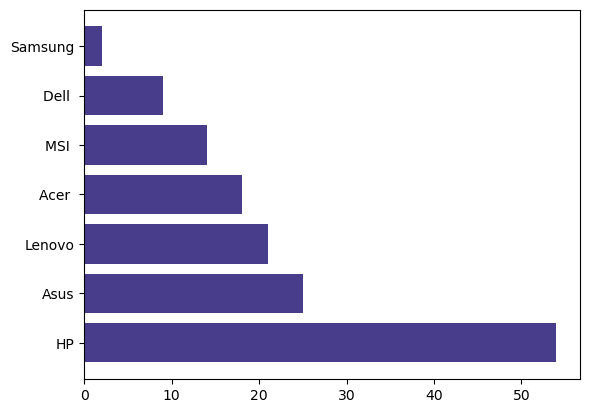

In [159]:
plt.barh(dfn['brand'].value_counts().index,dfn['brand'].value_counts(),color = 'darkslateblue')

(array([ 2.,  7.,  1., 11., 18., 22., 24., 38., 20.,  0.]),
 array([150000., 175000., 200000., 225000., 250000., 275000., 300000.,
        325000., 350000., 375000., 400000.]),
 <BarContainer object of 10 artists>)

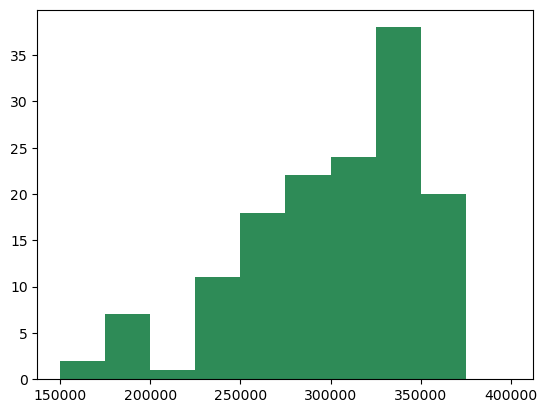

In [160]:
plt.hist(dfn['pricecash'],color = 'seagreen',range = [150000,400000])

***We have mostly HP laptops & laptops with 300-350k price range***

In [161]:
price = dfn['pricecash'].groupby(dfn['brand']).mean()

In [162]:
price

brand
Acer       287500.000000
Asus       312160.000000
Dell       289888.888889
HP         292388.888889
Lenovo     307476.190476
MSI        335000.000000
Samsung    306000.000000
Name: pricecash, dtype: float64

In [163]:
mn = dfn['pricecash'].mean()

<BarContainer object of 7 artists>

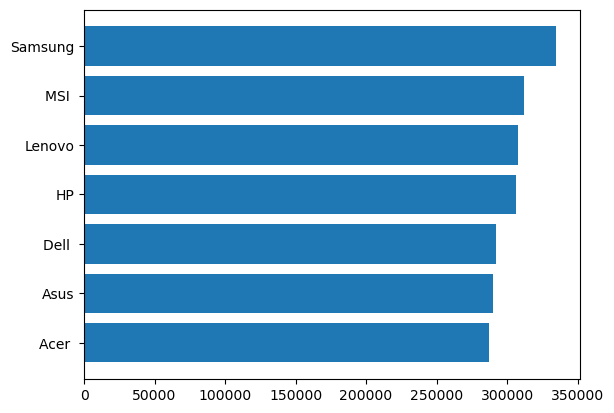

In [164]:
plt.barh(price.index,price.sort_values())

In [165]:
import plotly.express as px
import seaborn as sns

In [166]:
dfn['processor1'] = dfn['processor'].str[:8]

<Axes: xlabel='brand', ylabel='pricecash'>

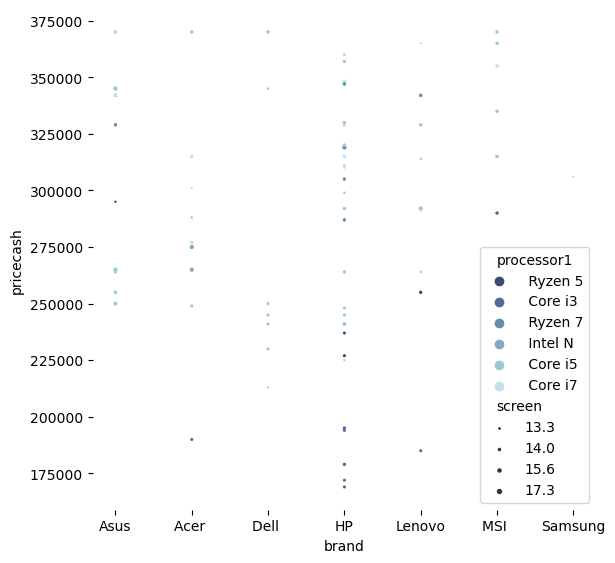

In [167]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
processor = list(dfn['processor'].unique())
processor1 = list(set([i[:8] for i in processor]))
sns.scatterplot(x="brand", y="pricecash",
                hue="processor1", size="screen",
                palette="ch:r=-.2,d=.3_r",
                hue_order=processor1,
                sizes=(1, 8), linewidth=0,
                data=dfn, ax=ax)

<Axes: xlabel='hdd', ylabel='pricecash'>

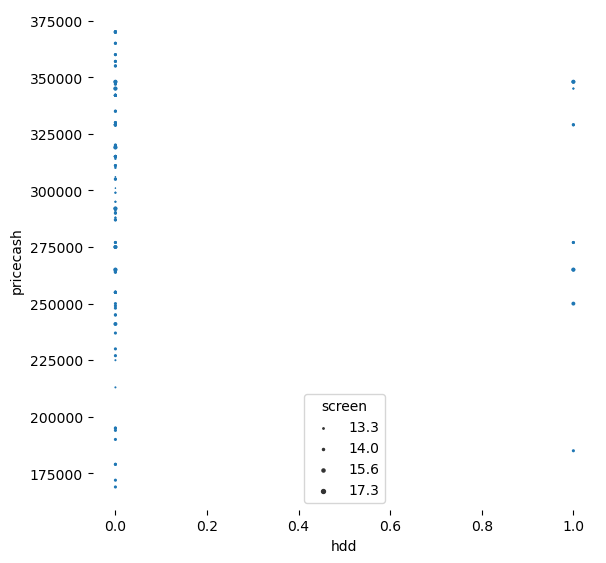

In [168]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="hdd", y="pricecash",
                size="screen",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=dfn, ax=ax)

# KMeans clustering

***To do clustering we will encode our string variables & scale numeric variables.***
***I chose onehotencoding, since actually it is harder to state that we have proven order for categorical variables.***

In [169]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

<font color = magenta>
We need further data cleaning.

In [170]:
dfn['flip'].unique()

array([nan,  1.])

In [171]:
dfn['flip'] = dfn['flip'].fillna(0)

In [172]:
dfn['touchscreen'].unique()

array([nan,  1.])

In [173]:
dfn['touchscreen'] = dfn['touchscreen'].fillna(0)

In [174]:
dfn.head(3)

,id,flip,touchscreen,brand,full brand,processor,ram,ssd,hdd,graphics,spec,screen,dos,price,pricecash,pricemonthly,processor1
0,75,0.0,0.0,Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200,Core i5
1,135,0.0,0.0,Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200,Core i5
2,27,0.0,0.0,Acer,Acer Aspire 3 A315-59-534T,Core i5 1235U,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,15.6,Dos,268900,249000,13800,Core i5


In [175]:
dfn['grafika'] = dfn['graphics'].str[:9]

In [176]:
dfn['grafika'].unique()

array([' Intel Ir', ' Intel UH', ' GeForce ', ' Geforce ', ' Iris Xe ',
       ' Radeon G'], dtype=object)

In [177]:
dfn['grafika'] = dfn['grafika'].str.replace(' Geforce ',' GeForce ')

In [178]:
dfn['graphics'].unique()

array([' Intel Iris Plus Graphics ', ' Intel UHD Graphics ',
       ' GeForce MX550 2Gb ', ' GeForce GTX1650 4Gb ',
       ' Geforce MX350 2Gb ', ' Iris Xe Graphics ',
       ' Geforce RTX3050 4Gb ', ' Radeon Graphics ',
       ' GeForce MX330 2Gb ', ' GeForce MX450 2Gb ',
       ' GeForce MX110 2Gb '], dtype=object)

In [179]:
dfn.head(3)

,id,flip,touchscreen,brand,full brand,processor,ram,ssd,hdd,graphics,spec,screen,dos,price,pricecash,pricemonthly,processor1,grafika
0,75,0.0,0.0,Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200,Core i5,Intel Ir
1,135,0.0,0.0,Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200,Core i5,Intel Ir
2,27,0.0,0.0,Acer,Acer Aspire 3 A315-59-534T,Core i5 1235U,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,15.6,Dos,268900,249000,13800,Core i5,Intel Ir


In [180]:
dfn['dos'].unique()

array([' Windows 11', ' Dos', ' Windows 10', '  Windows 10',
       '  Windows 11', ' Windows 10 Pro', '  Chrome OS',
       ' Windows 11 Pro', '  Windows 11 Pro', '  Windows 10 Pro'],
      dtype=object)

In [181]:
dfn['dos'] = dfn['dos'].str.replace(' Windows 11','Windows 11')

In [182]:
dfn['dos'] = dfn['dos'].str.replace(' Windows 11','Windows 11')

In [183]:
dfn['dos'] = dfn['dos'].str.replace(' Windows 10','Windows 10')

In [184]:
dfn['dos'] = dfn['dos'].str.replace(' Windows 10','Windows 10')

***we will not go in details for parameters, just will be guided by general brand or general kind of a parameter.***

# Separating columns

In [185]:
dfn.columns

Index(['id', 'flip', 'touchscreen', 'brand', 'full brand', 'processor', 'ram',
       'ssd', 'hdd', 'graphics', 'spec', 'screen', 'dos', 'price', 'pricecash',
       'pricemonthly', 'processor1', 'grafika'],
      dtype='object')

In [186]:
df_bool = dfn[['flip', 'touchscreen']]

In [187]:
df_onehot = dfn[['processor1', 'grafika','dos',]]

In [188]:
df_numeric = dfn[['ram','ssd', 'hdd','screen']]

In [189]:
onehot_encoder = OneHotEncoder(sparse_output=False)

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
numeric_encoder = StandardScaler()

In [192]:
df_numeric_scaled = numeric_encoder.fit_transform(df_numeric)

In [193]:
dfn_numeric_scaled = pd.DataFrame(df_numeric_scaled,columns =df_numeric.columns )

In [194]:
dfn_numeric_scaled .head()

,ram,ssd,hdd,screen
0,-0.403239,1.010545,-0.30266,1.855786
1,-0.403239,1.010545,-0.30266,1.855786
2,-0.403239,1.010545,-0.30266,0.161676
3,-0.403239,-0.689548,-0.30266,0.161676
4,-0.403239,-0.689548,-0.30266,0.161676


In [195]:
df_onehot_encoded = onehot_encoder.fit_transform(df_onehot)

In [196]:
df_onehot_encoded

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [197]:
dfn_onehot_encoded = pd.DataFrame(df_onehot_encoded)

In [198]:
dfn_onehot_encoded.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [199]:
jframes = [[df_bool,dfn_numeric_scaled,dfn_onehot_encoded]]

In [200]:
dfn_numeric_scaled

,ram,ssd,hdd,screen
0,-0.403239,1.010545,-0.30266,1.855786
1,-0.403239,1.010545,-0.30266,1.855786
2,-0.403239,1.010545,-0.30266,0.161676
3,-0.403239,-0.689548,-0.30266,0.161676
4,-0.403239,-0.689548,-0.30266,0.161676
...,...,...,...,...
138,-0.403239,1.010545,-0.30266,0.161676
139,-0.403239,1.010545,-0.30266,0.161676
140,-0.403239,1.010545,-0.30266,0.161676
141,-0.403239,-0.689548,-0.30266,-2.130355


In [201]:
X = pd.concat([df_bool,dfn_numeric_scaled,dfn_onehot_encoded],axis=1)

In [202]:
X.head(3)

,flip,touchscreen,ram,ssd,hdd,screen,0,1,2,3,...,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,-0.403239,1.010545,-0.30266,1.855786,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,-0.403239,1.010545,-0.30266,1.855786,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,-0.403239,1.010545,-0.30266,0.161676,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# KMeans clustering

In [203]:
from sklearn.metrics import silhouette_score

In [204]:
from sklearn.cluster import KMeans

In [205]:
len(X)

143

In [206]:
X

,flip,touchscreen,ram,ssd,hdd,screen,0,1,2,3,...,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,-0.403239,1.010545,-0.30266,1.855786,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,-0.403239,1.010545,-0.30266,1.855786,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,-0.403239,1.010545,-0.30266,0.161676,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.403239,-0.689548,-0.30266,0.161676,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-0.403239,-0.689548,-0.30266,0.161676,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.0,0.0,-0.403239,1.010545,-0.30266,0.161676,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
139,0.0,0.0,-0.403239,1.010545,-0.30266,0.161676,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
140,0.0,0.0,-0.403239,1.010545,-0.30266,0.161676,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
141,1.0,1.0,-0.403239,-0.689548,-0.30266,-2.130355,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [207]:
from sklearn.pipeline import Pipeline, make_pipeline

In [208]:
X.columns = X.columns.astype(str)

In [209]:
n_clusters = range(2,15)
inertia_errors=[]
silhouette_scores = []
for k in n_clusters:
    model = make_pipeline(KMeans(n_clusters=k,n_init = 2, random_state=42))
    model.fit(X)
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    silhouette_scores.append(silhouette_score(X,model.named_steps['kmeans'].labels_))
print("Inertia:", inertia_errors[:3])
print("Silhouette scores:",silhouette_scores[:3])


Inertia: [727.6174386762239, 579.9373205565967, 491.8872875360076]
Silhouette scores: [0.18752181072292615, 0.21025450540283178, 0.2328687470289819]


In [210]:
import plotly.express as px

In [211]:
fig = px.line(x = n_clusters, y= inertia_errors, title = 'KMeans Model:Inertia vs Number of Clusters')

In [212]:
fig.update_layout(xaxis_title = 'Number of cluster (k)',yaxis_title = 'Inertia')
fig.show()

In [213]:
final_model = make_pipeline(KMeans(n_clusters=5, random_state=42))
final_model.fit(X)
labels = final_model.named_steps['kmeans'].labels_

In [214]:
labels = pd.DataFrame(labels)

In [215]:
df_fin = pd.concat([dfn,labels],axis=1)

In [216]:
df_fin.rename(columns={0:'labels'},inplace=True)

In [217]:
avg_price=df_fin.groupby(['labels']).mean()

In [218]:
avg_price

,id,flip,touchscreen,ram,ssd,hdd,spec,screen,price,pricecash,pricemonthly
labels,,,,,,,,,,,
0,77.814815,0.148148,0.259259,8.444444,317.629630,0.0,1.0,13.844444,324248.148148,302259.259259,16692.592593
1,61.840909,0.136364,0.204545,8.272727,253.090909,0.0,1.0,15.715909,297790.909091,276727.272727,15331.818182
2,90.428571,0.000000,0.380952,17.142857,487.619048,0.0,NaN,15.609524,346747.619048,321095.238095,17866.666667
3,77.000000,0.000000,0.166667,10.000000,128.000000,1.0,1.0,16.041667,316050.000000,296916.666667,16283.333333
4,89.974359,0.000000,0.000000,8.000000,512.000000,0.0,1.0,15.948718,343192.307692,320333.333333,17666.666667


In [219]:
fig = px.bar(x = avg_price['pricecash'].sort_values(), barmode='group', title = 'Mean notebook price by Cluster')
fig.update_layout(xaxis_title = 'Price (AMD)',yaxis_title = 'Clusters')
fig.show()

In [228]:
df_fin[(df_fin['labels']==4)]

#0 - small ram large ssd
#1 - weaker models
#2 - better ram,ssd,screen
#3 - hdd
#4 - ram 8 ssd 512

,id,flip,touchscreen,brand,full brand,processor,ram,ssd,hdd,graphics,spec,screen,dos,price,pricecash,pricemonthly,processor1,grafika,labels
0,75,0.0,0.0,Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200,Core i5,Intel Ir,4
1,135,0.0,0.0,Asus,.Asus VivoBook K1703ZA-SB54,Core i5 12500H,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Windows 11,372600,345000,19200,Core i5,Intel Ir,4
2,27,0.0,0.0,Acer,Acer Aspire 3 A315-59-534T,Core i5 1235U,8.0,512.0,0.0,Intel Iris Plus Graphics,NaN,15.6,Dos,268900,249000,13800,Core i5,Intel Ir,4
8,36,0.0,0.0,Acer,Acer Aspire A317-33-P3A8,Intel N6000,4.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Dos,286200,265000,14700,Intel N,Intel Ir,4
9,96,0.0,0.0,Acer,Acer Aspire A317-33-P3A8,Intel N6000,4.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Dos,286200,265000,14700,Intel N,Intel Ir,4
10,38,0.0,0.0,Acer,Acer Aspire A317-33-P3A8,Intel N6000,12.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Dos,297000,275000,15300,Intel N,Intel Ir,4
11,98,0.0,0.0,Acer,Acer Aspire A317-33-P3A8,Intel N6000,12.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Dos,297000,275000,15300,Intel N,Intel Ir,4
20,85,0.0,0.0,Asus,Asus TUF Gaming F15 FX506HC-WS53,Core i5 11260H,8.0,512.0,0.0,Geforce RTX3050 4Gb,NaN,15.6,Windows 11,399600,370000,20600,Core i5,GeForce,4
21,145,0.0,0.0,Asus,Asus TUF Gaming F15 FX506HC-WS53,Core i5 11260H,8.0,512.0,0.0,Geforce RTX3050 4Gb,NaN,15.6,Windows 11,399600,370000,20600,Core i5,GeForce,4
22,73,0.0,0.0,Asus,Asus TUF Gaming FA506IHR-US51,Ryzen 5 4600H,8.0,512.0,0.0,GeForce GTX1650 4Gb,NaN,15.6,Windows 11,369300,342000,19000,Ryzen 5,GeForce,4


<Axes: xlabel='labels', ylabel='pricecash'>

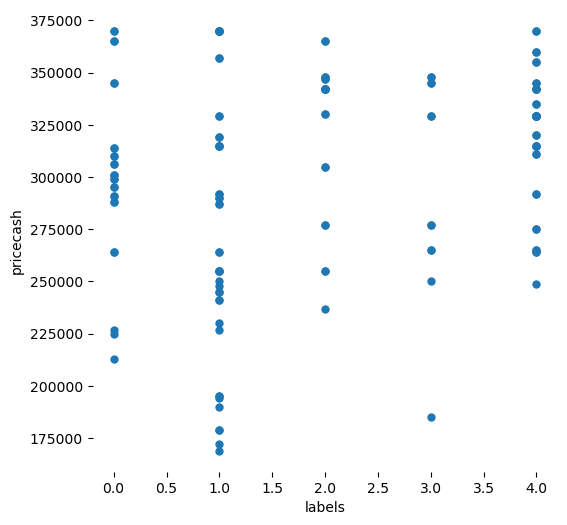

In [221]:
f, ax = plt.subplots(figsize=(6, 6))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="labels", y="pricecash",
                palette="ch:r=-.2,d=.3_r", linewidth=0,
                data=df_fin, ax=ax)

In [222]:
choice = df_fin[(df_fin['ram']>=16)&(df_fin['ssd']>=512)&(df_fin['screen']>=15.6)]

In [223]:
choice[choice['brand']=='HP']

,id,flip,touchscreen,brand,full brand,processor,ram,ssd,hdd,graphics,spec,screen,dos,price,pricecash,pricemonthly,processor1,grafika,labels
64,21,0.0,0.0,HP,HP 15s-eq3013ci,Ryzen 5 5625U,16.0,512.0,0.0,Radeon Graphics,NaN,15.6,Dos,255900,237000,13200,Ryzen 5,Radeon G,2
81,78,0.0,1.0,HP,HP 17-cn0065cl Touch,Core i7 1165G7,16.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Windows 11,375800,348000,19400,Core i7,Intel Ir,2
82,138,0.0,1.0,HP,HP 17-cn0065cl Touch,Core i7 1165G7,16.0,512.0,0.0,Intel Iris Plus Graphics,NaN,17.3,Windows 11,375800,348000,19400,Core i7,Intel Ir,2
94,77,0.0,1.0,HP,HP Pavilion 15-eh2085cl Touch,Ryzen 7 5825U,16.0,512.0,0.0,Radeon Graphics,NaN,15.6,Windows 11,374700,347000,19300,Ryzen 7,Radeon G,2
95,137,0.0,1.0,HP,HP Pavilion 15-eh2085cl Touch,Ryzen 7 5825U,16.0,512.0,0.0,Radeon Graphics,NaN,15.6,Windows 11,374700,347000,19300,Ryzen 7,Radeon G,2
104,67,0.0,0.0,HP,HP Victus 15-fa0031dx,Core i5 12450H,16.0,512.0,0.0,GeForce GTX1650 4Gb,NaN,15.6,Windows 11,356400,330000,18400,Core i5,GeForce,2
105,127,0.0,0.0,HP,HP Victus 15-fa0031dx,Core i5 12450H,16.0,512.0,0.0,GeForce GTX1650 4Gb,NaN,15.6,Windows 11,356400,330000,18400,Core i5,GeForce,2


In [229]:
min_price=df_fin.groupby(['labels']).min()
min_price

,id,flip,touchscreen,brand,full brand,processor,ram,ssd,hdd,graphics,spec,screen,dos,price,pricecash,pricemonthly,processor1,grafika
labels,,,,,,,,,,,,,,,,,,
0,16,0.0,0.0,Acer,Acer Swift 3 SF313-53G-501C,Core i5 10210U,4.0,128.0,0.0,Geforce MX350 2Gb,1.0,13.3,Chrome OS,230000,213000,11800,Core i5,GeForce
1,7,0.0,0.0,Acer,Acer Aspire 3 A315-59-79CL,Core i3 1005G1,4.0,128.0,0.0,GeForce GTX1650 4Gb,1.0,15.6,Dos,182500,169000,9400,Core i3,GeForce
2,21,0.0,0.0,Acer,Acer Aspire A515-56-765W,Core i5 11400H,12.0,256.0,0.0,GeForce GTX1650 4Gb,NaN,14.0,Dos,255900,237000,13200,Core i5,GeForce
3,11,0.0,0.0,Acer,Acer Aspire A315-59G-50FH,Core i3 10110U,4.0,0.0,1.0,GeForce GTX1650 4Gb,1.0,14.0,Dos,199800,185000,10300,Core i3,GeForce
4,27,0.0,0.0,Acer,.Asus VivoBook K1703ZA-SB54,Core i5 11260H,4.0,512.0,0.0,GeForce GTX1650 4Gb,1.0,15.6,Dos,268900,249000,13800,Core i5,GeForce


***Though I would like to choose a new brand for notebook, in google still people say that HP is more powerfull laptop for working professionals.It turned out that all the relevant notebooks I would like to choose belong to 2 cluster.Maybe I will choose between laptops in 2nd & 4th clusters.***